<a href="https://colab.research.google.com/github/pracowniaPK/ml_notebooks/blob/main/mnist_nests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.nn as nn
from torch import optim

In [ ]:
import datetime

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(training_data.data.size())

torch.Size([60000, 28, 28])


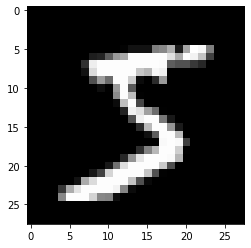

In [ ]:
plt.imshow(training_data.data[0], cmap='gray')

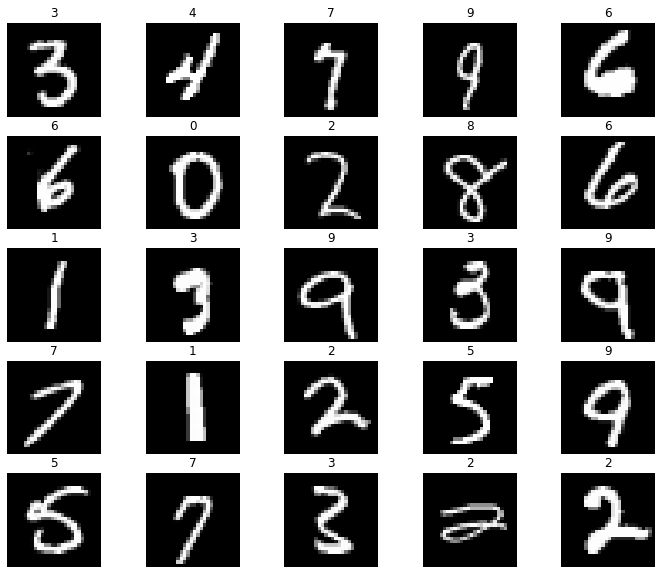

In [ ]:
figure = plt.figure(figsize=(12, 10))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
  idx = torch.randint(len(training_data), size=(1,))
  img, label = training_data[idx[0]]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')

In [ ]:
training_dataloader = DataLoader(training_data, batch_size=128) #, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=128, shuffle=True)

In [ ]:
class ModelFullyConnected(nn.Module):

  def __init__(self):
    super(ModelFullyConnected, self).__init__()
    self.flatten = nn.Flatten()
    self.l1 = nn.Linear(28*28, 100)
    self.l2 = nn.Linear(100, 50)
    self.l3 = nn.Linear(50,10)
    self.relu = nn.ReLU()
    self.softmax = nn.Softmax()

  def forward(self, x):
    x = self.flatten(x)
    x = self.relu(self.l1(x))
    x = self.relu(self.l2(x))
    # x = self.softmax(self.l3(x))
    x = self.l3(x)
    return x

In [ ]:
class ModelCNN(nn.Module):

  def __init__(self):
    super(ModelCNN, self).__init__()
    self.conv1 = nn.Sequential(
      nn.Conv2d(
          in_channels=1,
          out_channels=16,
          kernel_size=5,
          stride=1,
          padding=2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.conv2 = nn.Sequential(
      nn.Conv2d(
          in_channels=16,
          out_channels=32,
          kernel_size=5,
          stride=1,
          padding=2
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )
    self.out = nn.Linear(32*7*7, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)
    x = self.out(x)
    return x

In [ ]:
def test(nn, loader, loss_func):
  num_batches = len(loader)
  cum_loss = 0

  for i, (X, y) in enumerate(loader):
    pred = nn(X)
    loss = loss_func(pred, y)
    cum_loss += loss.item()

  return cum_loss/num_batches


def train(epochs, nn, loader, loss_func, optimizer):
  nn.train()

  steps = len(loader)

  timer = datetime.datetime.now()
  train_losses = []
  test_losses = []

  for epoch in range(epochs):
    cum_train_loss = 0
    num_batches = len(loader)
    for i, (X, y) in enumerate(loader):
      pred = nn(X)
      loss = loss_func(pred, y)
      cum_train_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    train_losses.append(cum_train_loss/num_batches)
    test_losses.append(test(nn, loader, loss_func))
    print("Epoch {}, time: {}, test loss: {}".format(
          epoch, (datetime.datetime.now()-timer), test_losses[-1]))
    timer = datetime.datetime.now()
  plt.plot(train_losses, label='Train loss')
  plt.plot(test_losses, label='Test loss')
  plt.legend()

In [ ]:
cnn = ModelCNN()
print(cnn, "\n")
loss_func = nn.CrossEntropyLoss()
print(loss_func, "\n")
optimizer_cnn = optim.Adam(cnn.parameters(), lr = 0.001)
print(optimizer_cnn, "\n")


ModelCNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
) 

CrossEntropyLoss() 

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.001
    maximize: False
    weight_decay: 0
) 



Epoch 0, time: 0:01:07.303633, test loss: 0.05230672971078896
Epoch 1, time: 0:01:07.917800, test loss: 0.04038354183299227
Epoch 2, time: 0:01:07.160120, test loss: 0.035115683183310056
Epoch 3, time: 0:01:10.531815, test loss: 0.030738469611392663
Epoch 4, time: 0:01:08.168517, test loss: 0.027320352744614917


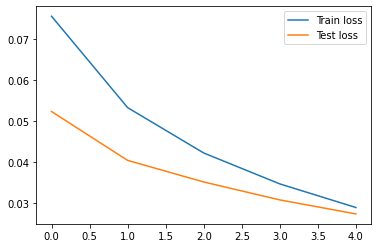

In [ ]:
train(5, cnn, training_dataloader, loss_func, optimizer_cnn)

In [ ]:
fcn = ModelFullyConnected()
print(fcn, "\n")
loss_func = nn.CrossEntropyLoss()
print(loss_func, "\n")
optimizer = optim.Adam(fcn.parameters(), lr = 0.0005)
print(optimizer, "\n")

ModelFullyConnected(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (l1): Linear(in_features=784, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=50, bias=True)
  (l3): Linear(in_features=50, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=None)
) 

CrossEntropyLoss() 

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: False
    lr: 0.0005
    maximize: False
    weight_decay: 0
) 



In [ ]:
train(10, fcn, training_dataloader, loss_func, optimizer)

ValueError: ignored